## Week 6 Assignment - Data Sets

**By Eddie Xu and Mohamed Hassan-El Serafi**

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
Dataset.
Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html
What can you infer about the relationships between (1) the women, and (2) the social events?  

Please provide your code and analysis in an Jupyter notebook stored in your GitHub repository.

You may work in a small group on this project.

In addition to link provided above, we also used this link to obtain the data for women and clubs: https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.davis_southern_women_graph.html#networkx.generators.social.davis_southern_women_graph

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
import random
from networkx.algorithms import bipartite
import networkx.algorithms.community as nx_comm
import pandas as pd 

%matplotlib inline
plt.rcParams["figure.figsize"] = (12,10)

In [2]:
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


In [3]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


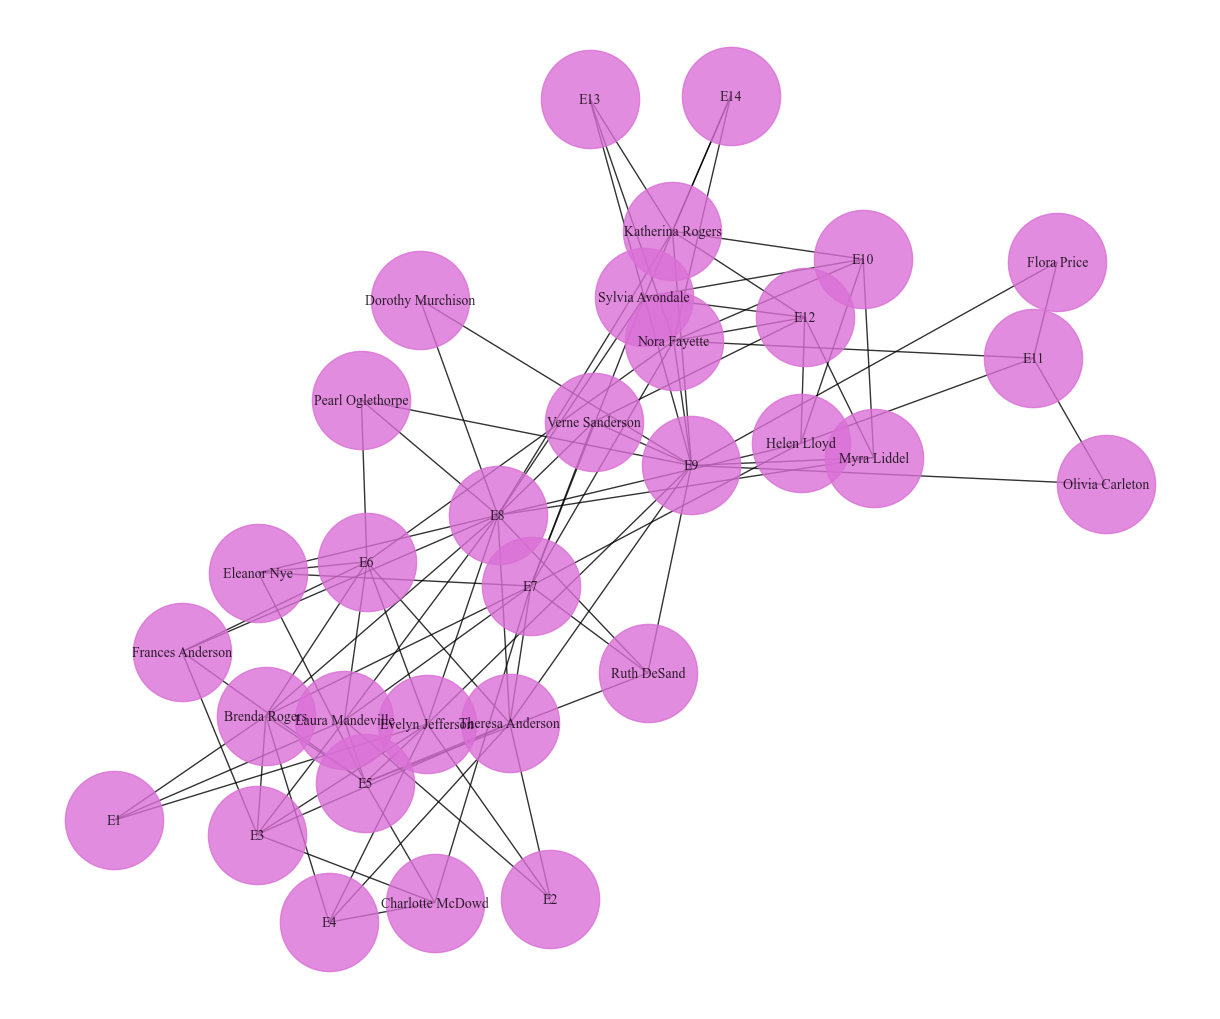

In [4]:
pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos, with_labels=True, node_size=5000, node_color="orchid", font_size=10, font_family="Times New Roman", font_color="black",
                edge_color="black", alpha=0.8)
plt.show()

From the network graph, a few observations stand out. It appears that Brenda Rogers, Laura Mandeville, Evelyn Jefferson, and Theresa Anderson are clustered together, suggesting they attend meetings together and have the most connections indicated by the number of edges around their nodes. Similarly, Nora Fayette, Sylvia Avondale, and Katherina Rogers are also clustered together and have a fair amount of edges around their nodes. In terms of clubs, E8, E7, E6 and E5 appear to have the most connections with other clubs, while E1 and E2 clubs don't have as many connections. We'll first unpack the centrality measures of women and clubs, respectively, and examine their relationships together. 

## Degree Centrality for Women Participants and Clubs

In [5]:
# Compute degree centrality for all nodes
degree_centrality = nx.degree_centrality(G)

# Separate by node type
women_degree_centrality = {k: v for k, v in degree_centrality.items() if k in women}
clubs_degree_centrality = {k: v for k, v in degree_centrality.items() if k in clubs}

In [48]:
sorted(women_degree_centrality, reverse=True)

['Verne Sanderson',
 'Theresa Anderson',
 'Sylvia Avondale',
 'Ruth DeSand',
 'Pearl Oglethorpe',
 'Olivia Carleton',
 'Nora Fayette',
 'Myra Liddel',
 'Laura Mandeville',
 'Katherina Rogers',
 'Helen Lloyd',
 'Frances Anderson',
 'Flora Price',
 'Evelyn Jefferson',
 'Eleanor Nye',
 'Dorothy Murchison',
 'Charlotte McDowd',
 'Brenda Rogers']

In [45]:
clubs_degree_centrality

{'E1': 0.0967741935483871,
 'E2': 0.0967741935483871,
 'E3': 0.1935483870967742,
 'E4': 0.12903225806451613,
 'E5': 0.25806451612903225,
 'E6': 0.25806451612903225,
 'E7': 0.3225806451612903,
 'E8': 0.45161290322580644,
 'E9': 0.3870967741935484,
 'E10': 0.16129032258064516,
 'E11': 0.12903225806451613,
 'E12': 0.1935483870967742,
 'E13': 0.0967741935483871,
 'E14': 0.0967741935483871}

In [7]:
# Display top results
print("Top 10 Women by Degree Centrality:", sorted(women_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
print("Top 10 Clubs by Degree Centrality:", sorted(clubs_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10])

Top 10 Women by Degree Centrality: [('Evelyn Jefferson', 0.25806451612903225), ('Theresa Anderson', 0.25806451612903225), ('Nora Fayette', 0.25806451612903225), ('Laura Mandeville', 0.22580645161290322), ('Brenda Rogers', 0.22580645161290322), ('Sylvia Avondale', 0.22580645161290322), ('Katherina Rogers', 0.1935483870967742), ('Helen Lloyd', 0.16129032258064516), ('Charlotte McDowd', 0.12903225806451613), ('Frances Anderson', 0.12903225806451613)]
Top 10 Clubs by Degree Centrality: [('E8', 0.45161290322580644), ('E9', 0.3870967741935484), ('E7', 0.3225806451612903), ('E5', 0.25806451612903225), ('E6', 0.25806451612903225), ('E3', 0.1935483870967742), ('E12', 0.1935483870967742), ('E10', 0.16129032258064516), ('E4', 0.12903225806451613), ('E11', 0.12903225806451613)]


In [8]:
degree_women_df = pd.DataFrame(sorted(women_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10], 
                               columns=['Name', 'Degree Centrality'])

In [9]:
degree_women_df

,Name,Degree Centrality
0,Evelyn Jefferson,0.258065
1,Theresa Anderson,0.258065
2,Nora Fayette,0.258065
3,Laura Mandeville,0.225806
4,Brenda Rogers,0.225806
5,Sylvia Avondale,0.225806
6,Katherina Rogers,0.193548
7,Helen Lloyd,0.161290
8,Charlotte McDowd,0.129032
9,Frances Anderson,0.129032


In [10]:
degree_clubs_df = pd.DataFrame(sorted(clubs_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10], 
                               columns=['Club', 'Degree Centrality'])

In [11]:
degree_clubs_df

,Club,Degree Centrality
0,E8,0.451613
1,E9,0.387097
2,E7,0.322581
3,E5,0.258065
4,E6,0.258065
5,E3,0.193548
6,E12,0.193548
7,E10,0.161290
8,E4,0.129032
9,E11,0.129032


## Betweenness Centrality

In [12]:
# Compute betweenness centrality for all nodes
betweenness_centrality = nx.betweenness_centrality(G)

# Separate by node type
women_betweenness_centrality = {k: v for k, v in betweenness_centrality.items() if k in women}
clubs_betweenness_centrality = {k: v for k, v in betweenness_centrality.items() if k in clubs}

In [13]:
# Display top results
print("Top 10 Women by Betweenness Centrality:", sorted(women_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
print("Top 10 Clubs by Betweenness Centrality:", sorted(clubs_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10])

Top 10 Women by Betweenness Centrality: [('Nora Fayette', 0.10858130346049079), ('Evelyn Jefferson', 0.09243053952845212), ('Theresa Anderson', 0.08382717212549207), ('Sylvia Avondale', 0.06862488078028632), ('Laura Mandeville', 0.04914868366576943), ('Brenda Rogers', 0.04735814390994237), ('Katherina Rogers', 0.0453256463296124), ('Helen Lloyd', 0.0405644200615806), ('Ruth DeSand', 0.01606125402625199), ('Myra Liddel', 0.01564136563963574)]
Top 10 Clubs by Betweenness Centrality: [('E8', 0.23700300426238308), ('E9', 0.21920891071174742), ('E7', 0.1258812653738273), ('E6', 0.06319868906402719), ('E5', 0.03664061940065164), ('E11', 0.01911560576755823), ('E3', 0.017714891753424267), ('E12', 0.017588323198345388), ('E10', 0.011122410270192064), ('E4', 0.007486726470019202)]


In [14]:
betweenness_women_df = pd.DataFrame(sorted(women_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10], 
                               columns=['Name', 'Betweenness Centrality'])

In [15]:
betweenness_women_df

,Name,Betweenness Centrality
0,Nora Fayette,0.108581
1,Evelyn Jefferson,0.092431
2,Theresa Anderson,0.083827
3,Sylvia Avondale,0.068625
4,Laura Mandeville,0.049149
5,Brenda Rogers,0.047358
6,Katherina Rogers,0.045326
7,Helen Lloyd,0.040564
8,Ruth DeSand,0.016061
9,Myra Liddel,0.015641


In [16]:
betweenness_clubs_df = pd.DataFrame(sorted(clubs_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10], 
                               columns=['Club', 'Betweenness Centrality'])

In [17]:
betweenness_clubs_df

,Club,Betweenness Centrality
0,E8,0.237003
1,E9,0.219209
2,E7,0.125881
3,E6,0.063199
4,E5,0.036641
5,E11,0.019116
6,E3,0.017715
7,E12,0.017588
8,E10,0.011122
9,E4,0.007487


## Closeness Centrality

In [18]:
# Compute closeness centrality for all nodes
closeness_centrality = nx.closeness_centrality(G)

# Separate by node type
women_closeness_centrality = {k: v for k, v in closeness_centrality.items() if k in women}
clubs_closeness_centrality = {k: v for k, v in closeness_centrality.items() if k in clubs}

In [19]:
# Display top results
print("Top 10 Women by Closeness Centrality:", sorted(women_closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
print("Top 10 Clubs by Closeness Centrality:", sorted(clubs_closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10])

Top 10 Women by Closeness Centrality: [('Evelyn Jefferson', 0.5166666666666667), ('Theresa Anderson', 0.5166666666666667), ('Nora Fayette', 0.5166666666666667), ('Sylvia Avondale', 0.5), ('Laura Mandeville', 0.4696969696969697), ('Brenda Rogers', 0.4696969696969697), ('Katherina Rogers', 0.4696969696969697), ('Helen Lloyd', 0.4696969696969697), ('Ruth DeSand', 0.45588235294117646), ('Verne Sanderson', 0.45588235294117646)]
Top 10 Clubs by Closeness Centrality: [('E8', 0.5961538461538461), ('E9', 0.5535714285714286), ('E7', 0.5166666666666667), ('E6', 0.484375), ('E5', 0.4189189189189189), ('E3', 0.3974358974358974), ('E12', 0.3974358974358974), ('E10', 0.3875), ('E4', 0.3780487804878049), ('E11', 0.3780487804878049)]


In [20]:
closeness_women_df = pd.DataFrame(sorted(women_closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10], 
                               columns=['Name', 'Closeness Centrality'])

In [21]:
closeness_women_df

,Name,Closeness Centrality
0,Evelyn Jefferson,0.516667
1,Theresa Anderson,0.516667
2,Nora Fayette,0.516667
3,Sylvia Avondale,0.500000
4,Laura Mandeville,0.469697
5,Brenda Rogers,0.469697
6,Katherina Rogers,0.469697
7,Helen Lloyd,0.469697
8,Ruth DeSand,0.455882
9,Verne Sanderson,0.455882


In [22]:
closeness_clubs_df = pd.DataFrame(sorted(clubs_closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10], 
                               columns=['Club', 'Closeness Centrality'])

In [23]:
closeness_clubs_df

,Club,Closeness Centrality
0,E8,0.596154
1,E9,0.553571
2,E7,0.516667
3,E6,0.484375
4,E5,0.418919
5,E3,0.397436
6,E12,0.397436
7,E10,0.387500
8,E4,0.378049
9,E11,0.378049


## Eigenvector Centrality

In [24]:
# Compute eigenvector centrality for all nodes
eigenvector_centrality = nx.eigenvector_centrality(G)

# Separate by node type
women_eigenvector_centrality = {k: v for k, v in eigenvector_centrality.items() if k in women}
clubs_eigenvector_centrality = {k: v for k, v in eigenvector_centrality.items() if k in clubs}

In [25]:
# Display top results
print("Top 10 Women by Eigenvector Centrality:", sorted(women_eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
print("Top 10 Clubs by Eigenvector Centrality:", sorted(clubs_eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10])

Top 10 Women by Eigenvector Centrality: [('Theresa Anderson', 0.262027292675683), ('Evelyn Jefferson', 0.2366919995659382), ('Brenda Rogers', 0.22132997761985007), ('Laura Mandeville', 0.2186542585066598), ('Sylvia Avondale', 0.19599165124742376), ('Nora Fayette', 0.18660813789991867), ('Ruth DeSand', 0.16690522908643124), ('Eleanor Nye', 0.1614646316022873), ('Katherina Rogers', 0.1557690878247752), ('Verne Sanderson', 0.15443075747425528)]
Top 10 Clubs by Eigenvector Centrality: [('E8', 0.35824435911378705), ('E7', 0.27117822447266177), ('E9', 0.2683424242623056), ('E6', 0.23166230400784954), ('E5', 0.227500512695069), ('E3', 0.17879448898670355), ('E12', 0.1433982299008923), ('E4', 0.12444520652004), ('E10', 0.12049201761650306), ('E2', 0.10640565406401607)]


In [26]:
eigenvector_women_df = pd.DataFrame(sorted(women_eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10], 
                               columns=['Name', 'Eigenvector Centrality'])

In [27]:
eigenvector_women_df

,Name,Eigenvector Centrality
0,Theresa Anderson,0.262027
1,Evelyn Jefferson,0.236692
2,Brenda Rogers,0.221330
3,Laura Mandeville,0.218654
4,Sylvia Avondale,0.195992
5,Nora Fayette,0.186608
6,Ruth DeSand,0.166905
7,Eleanor Nye,0.161465
8,Katherina Rogers,0.155769
9,Verne Sanderson,0.154431


In [28]:
eigenvector_clubs_df = pd.DataFrame(sorted(clubs_eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10], 
                               columns=['Club', 'Eigenvector Centrality'])

In [29]:
eigenvector_clubs_df

,Club,Eigenvector Centrality
0,E8,0.358244
1,E7,0.271178
2,E9,0.268342
3,E6,0.231662
4,E5,0.227501
5,E3,0.178794
6,E12,0.143398
7,E4,0.124445
8,E10,0.120492
9,E2,0.106406


## Analysis of Community of Women

In [30]:
# Get edge weights (number of shared clubs)
women_graph = nx.bipartite.projected_graph(G, women)

for u, v, data in women_graph.edges(data=True):
    data["weight"] = len(set(G[u]) & set(G[v]))  # Count common clubs

# Find strongest connections (most shared clubs)
strongest_connections = sorted(women_graph.edges(data=True), key=lambda x: x[2]["weight"], reverse=True)
print("Top 10 Strongest Relationships (Most Shared Clubs):", strongest_connections[:10])

Top 10 Strongest Relationships (Most Shared Clubs): [('Evelyn Jefferson', 'Theresa Anderson', {'weight': 7}), ('Evelyn Jefferson', 'Laura Mandeville', {'weight': 6}), ('Evelyn Jefferson', 'Brenda Rogers', {'weight': 6}), ('Laura Mandeville', 'Brenda Rogers', {'weight': 6}), ('Laura Mandeville', 'Theresa Anderson', {'weight': 6}), ('Theresa Anderson', 'Brenda Rogers', {'weight': 6}), ('Katherina Rogers', 'Sylvia Avondale', {'weight': 6}), ('Sylvia Avondale', 'Nora Fayette', {'weight': 6}), ('Katherina Rogers', 'Nora Fayette', {'weight': 5}), ('Evelyn Jefferson', 'Frances Anderson', {'weight': 4})]


In [31]:
strongest_conn = pd.DataFrame(strongest_connections, columns=['Woman 1', 'Woman 2', 'Weight'])

In [32]:
strongest_conn.head(20)

,Woman 1,Woman 2,Weight
0,Evelyn Jefferson,Theresa Anderson,{'weight': 7}
1,Evelyn Jefferson,Laura Mandeville,{'weight': 6}
2,Evelyn Jefferson,Brenda Rogers,{'weight': 6}
3,Laura Mandeville,Brenda Rogers,{'weight': 6}
4,Laura Mandeville,Theresa Anderson,{'weight': 6}
5,Theresa Anderson,Brenda Rogers,{'weight': 6}
6,Katherina Rogers,Sylvia Avondale,{'weight': 6}
7,Sylvia Avondale,Nora Fayette,{'weight': 6}
8,Katherina Rogers,Nora Fayette,{'weight': 5}
9,Evelyn Jefferson,Frances Anderson,{'weight': 4}


In [33]:
# Apply Louvain community detection
communities = list(nx_comm.louvain_communities(women_graph, seed=42))

# Assign community labels
community_map = {}
for i, community in enumerate(communities):
    for person in community:
        community_map[person] = i

# Print detected communities
for i, community in enumerate(communities):
    print(f"Community {i+1}: {community}")

Community 1: {'Ruth DeSand', 'Charlotte McDowd', 'Eleanor Nye', 'Brenda Rogers', 'Laura Mandeville', 'Theresa Anderson', 'Frances Anderson', 'Evelyn Jefferson'}
Community 2: {'Katherina Rogers', 'Myra Liddel', 'Sylvia Avondale', 'Olivia Carleton', 'Dorothy Murchison', 'Nora Fayette', 'Flora Price', 'Helen Lloyd', 'Pearl Oglethorpe', 'Verne Sanderson'}


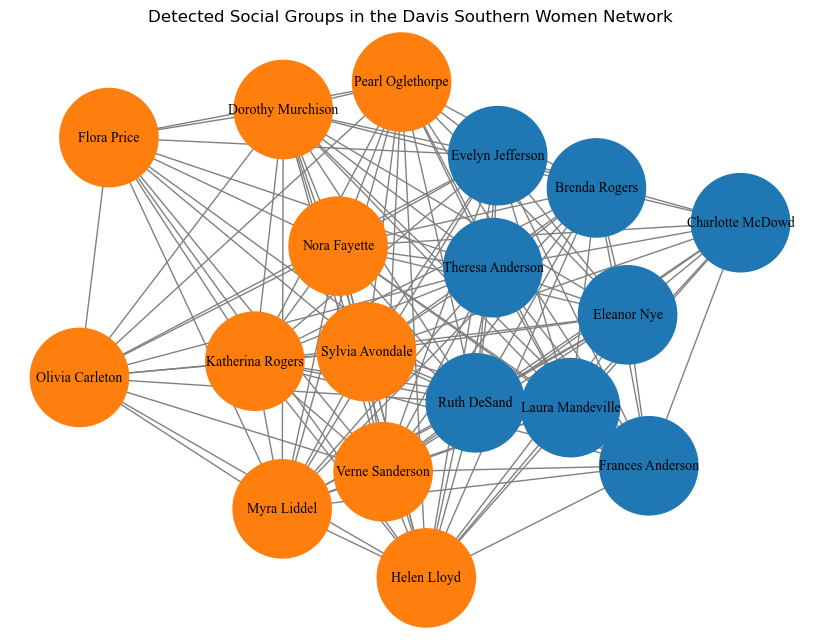

In [34]:
# Generate distinct colors for communities
colors = list(mcolors.TABLEAU_COLORS.values())

# Assign node colors based on communities
node_colors = [colors[community_map[n] % len(colors)] for n in women_graph.nodes()]

# Draw the women-only network with community colors
plt.figure(figsize=(8, 6))
nx.draw(women_graph, with_labels=True, node_color=node_colors, edge_color="gray", node_size=5000, 
        font_size=10, font_family="Times New Roman")
plt.title("Detected Social Groups in the Davis Southern Women Network")
plt.show()

## Top 5 Influential Women for Each Centrality Measure

In [35]:
# Sort events by each measure
top5_women_degree = sorted(women, key=lambda x: degree_centrality[x], reverse=True)[:5]
top5_women_betweenness = sorted(women, key=lambda x: betweenness_centrality[x], reverse=True)[:5]
top5_women_closeness = sorted(women, key=lambda x: closeness_centrality[x], reverse=True)[:5]
top5_women_eigenvector = sorted(women, key=lambda x: eigenvector_centrality[x], reverse=True)[:5]

# Display results
print("Top 5 Influential Women by Degree Centrality** (Most attended):", top5_women_degree)
print("Top 5 Influential Women by Betweenness Centrality** (Bridges between groups):", top5_women_betweenness)
print("Top 5 Influential Women by Closeness Centrality** (Bridges between groups):", top5_women_closeness)
print("Top 5 Influential Women by Eigenvector Centrality** (Most influential):", top5_women_eigenvector)

Top 5 Influential Women by Degree Centrality** (Most attended): ['Evelyn Jefferson', 'Theresa Anderson', 'Nora Fayette', 'Laura Mandeville', 'Brenda Rogers']
Top 5 Influential Women by Betweenness Centrality** (Bridges between groups): ['Nora Fayette', 'Evelyn Jefferson', 'Theresa Anderson', 'Sylvia Avondale', 'Laura Mandeville']
Top 5 Influential Women by Closeness Centrality** (Bridges between groups): ['Evelyn Jefferson', 'Theresa Anderson', 'Nora Fayette', 'Sylvia Avondale', 'Laura Mandeville']
Top 5 Influential Women by Eigenvector Centrality** (Most influential): ['Theresa Anderson', 'Evelyn Jefferson', 'Brenda Rogers', 'Laura Mandeville', 'Sylvia Avondale']


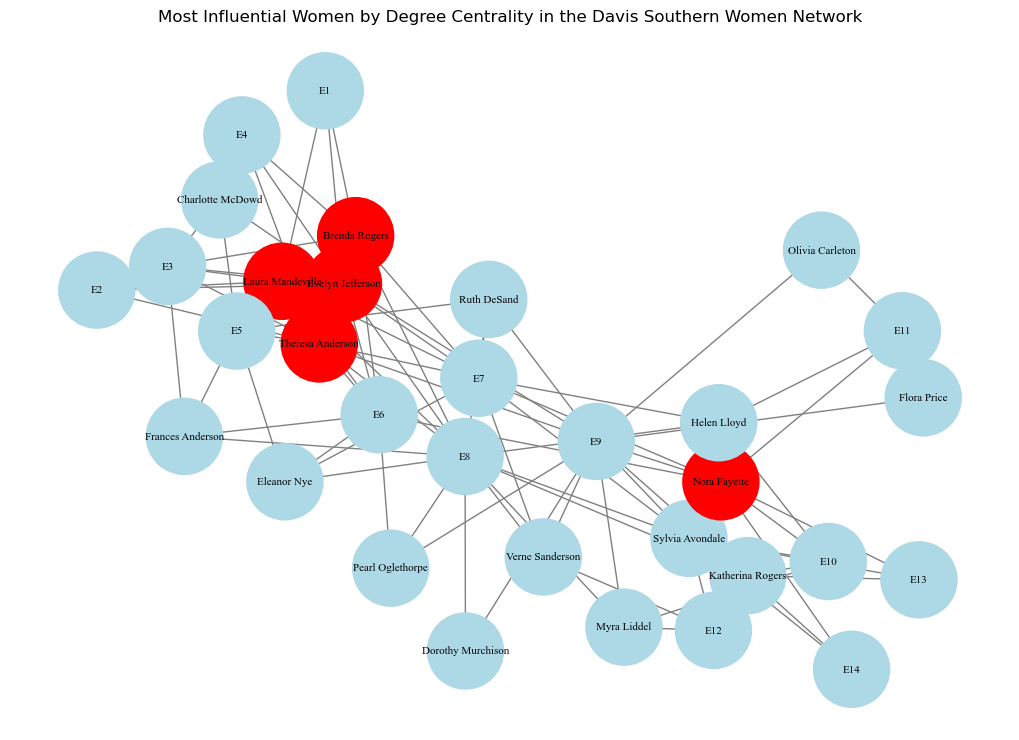

In [36]:
# Assign colors: Highly central events = red, others = lightblue
clubs_colors = ["red" if node in top5_women_degree else "lightblue" for node in G.nodes()]

# Draw the bipartite network
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_color=clubs_colors, edge_color="gray", node_size=3000, font_size=8, 
        font_family="Times New Roman")
plt.title("Most Influential Women by Degree Centrality in the Davis Southern Women Network")
plt.show()

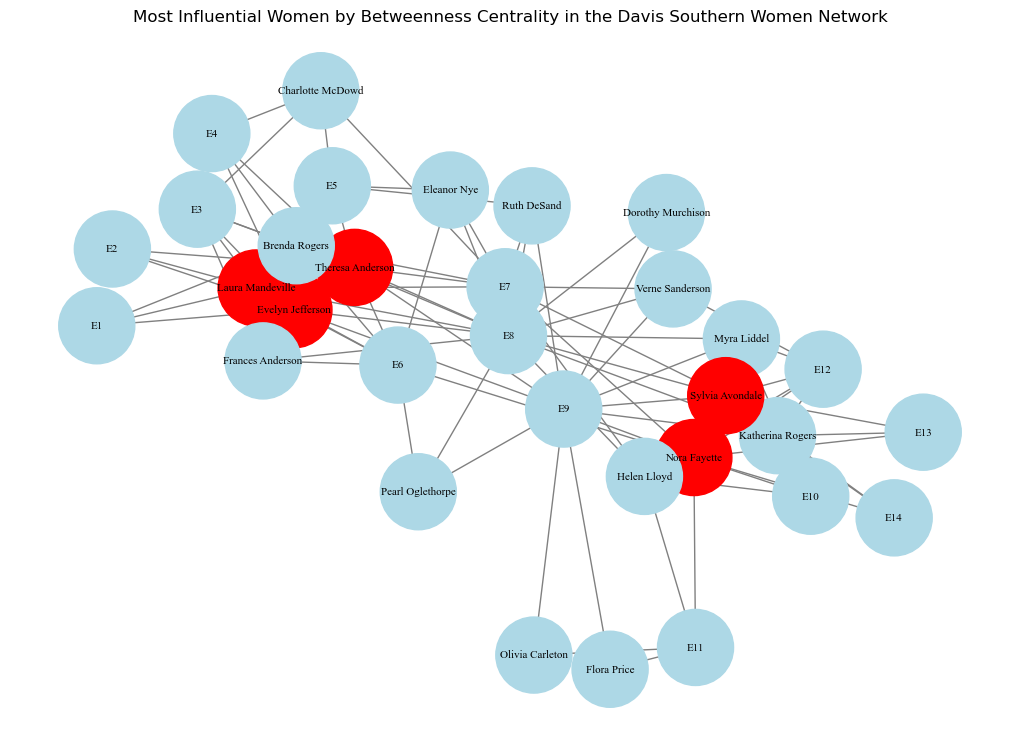

In [37]:
# Assign colors: Highly central events = red, others = lightblue
clubs_colors = ["red" if node in top5_women_betweenness else "lightblue" for node in G.nodes()]

# Draw the bipartite network
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_color=clubs_colors, edge_color="gray", node_size=3000, font_size=8, 
        font_family="Times New Roman")
plt.title("Most Influential Women by Betweenness Centrality in the Davis Southern Women Network")
plt.show()

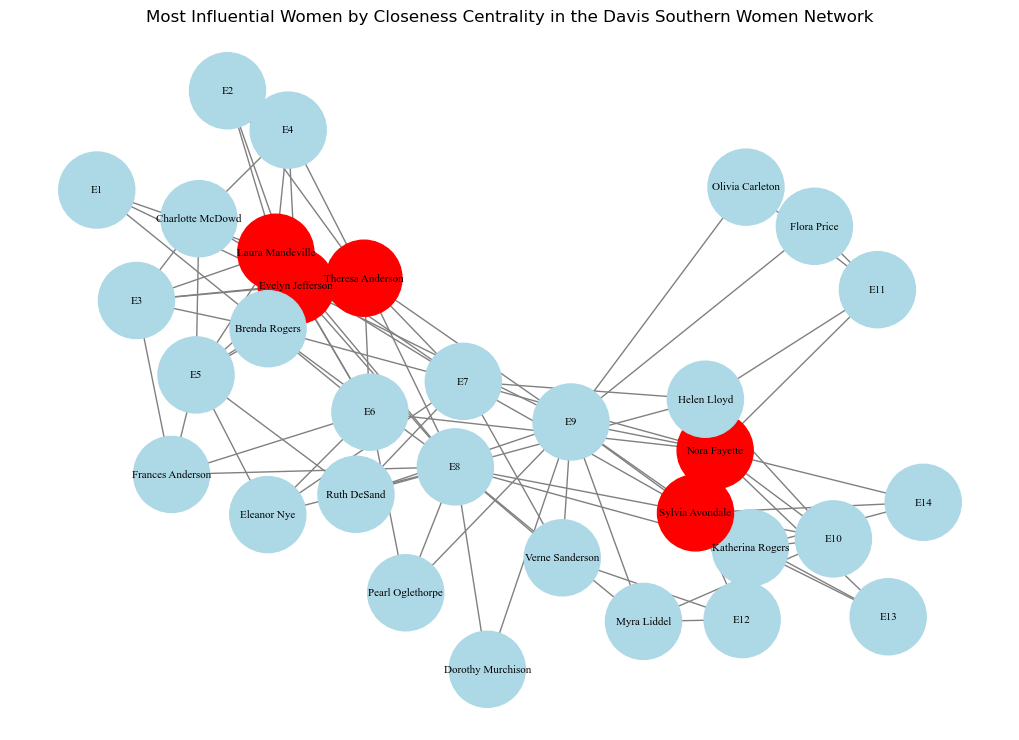

In [38]:
# Assign colors: Highly central events = red, others = lightblue
clubs_colors = ["red" if node in top5_women_closeness else "lightblue" for node in G.nodes()]

# Draw the bipartite network
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_color=clubs_colors, edge_color="gray", node_size=3000, font_size=8, 
        font_family="Times New Roman")
plt.title("Most Influential Women by Closeness Centrality in the Davis Southern Women Network")
plt.show()

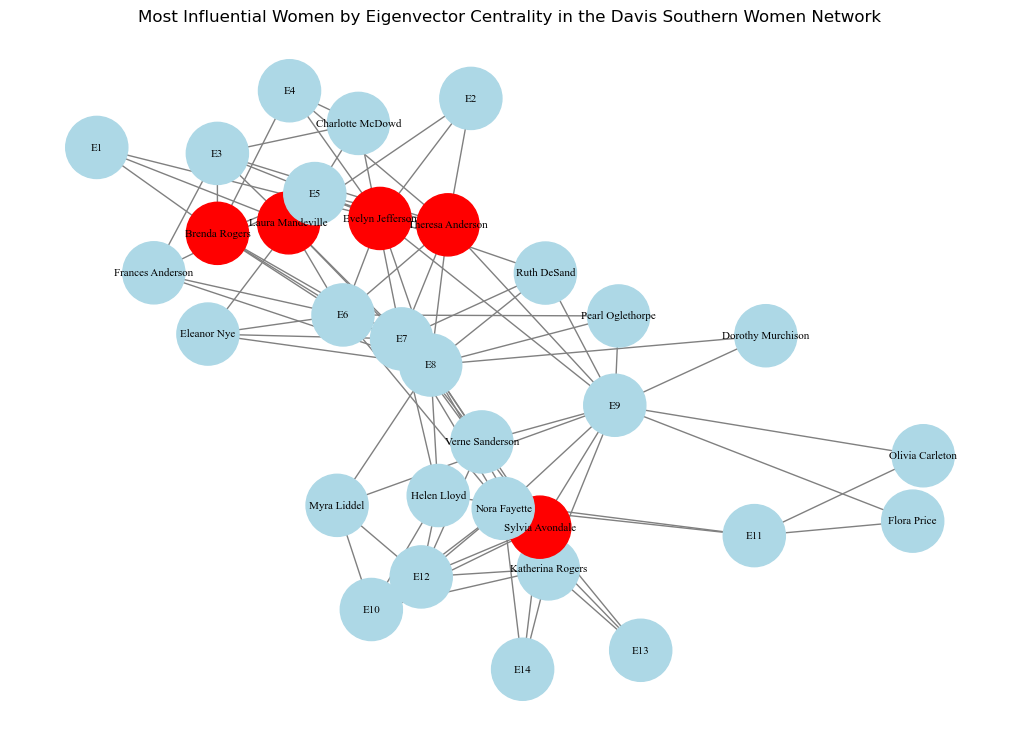

In [39]:
# Assign colors: Highly central events = red, others = lightblue
clubs_colors = ["red" if node in top5_women_eigenvector else "lightblue" for node in G.nodes()]

# Draw the bipartite network
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_color=clubs_colors, edge_color="gray", node_size=2000, font_size=8, 
        font_family="Times New Roman")
plt.title("Most Influential Women by Eigenvector Centrality in the Davis Southern Women Network")
plt.show()

## Top 5 Influential Clubs for Each Centrality Measure

In [40]:
# Sort events by each measure
top5_clubs_degree = sorted(clubs, key=lambda x: degree_centrality[x], reverse=True)[:5]
top5_clubs_betweenness = sorted(clubs, key=lambda x: betweenness_centrality[x], reverse=True)[:5]
top5_clubs_closeness = sorted(clubs, key=lambda x: closeness_centrality[x], reverse=True)[:5]
top5_clubs_eigenvector = sorted(clubs, key=lambda x: eigenvector_centrality[x], reverse=True)[:5]

# Display results
print("Top 5 Clubs by Degree Centrality** (Most attended):", top5_clubs_degree)
print("Top Clubs by Betweenness Centrality** (Bridges between groups):", top5_clubs_betweenness)
print("Top Clubs by Closeness Centrality** (Bridges between groups):", top5_clubs_closeness)
print("Top Clubs by Eigenvector Centrality** (Most influential):", top5_clubs_eigenvector)

Top 5 Clubs by Degree Centrality** (Most attended): ['E8', 'E9', 'E7', 'E5', 'E6']
Top Clubs by Betweenness Centrality** (Bridges between groups): ['E8', 'E9', 'E7', 'E6', 'E5']
Top Clubs by Closeness Centrality** (Bridges between groups): ['E8', 'E9', 'E7', 'E6', 'E5']
Top Clubs by Eigenvector Centrality** (Most influential): ['E8', 'E7', 'E9', 'E6', 'E5']


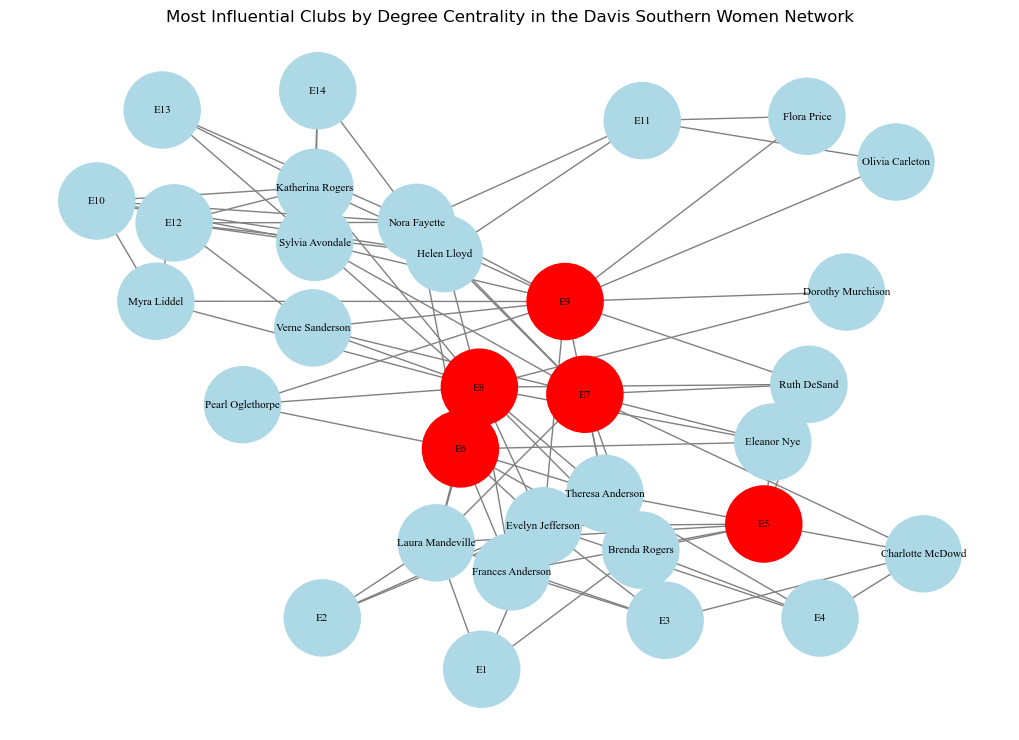

In [41]:
# Assign colors: Highly central events = red, others = lightblue
clubs_colors = ["red" if node in top5_clubs_degree else "lightblue" for node in G.nodes()]

# Draw the bipartite network
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_color=clubs_colors, edge_color="gray", node_size=3000, font_size=8, 
        font_family="Times New Roman")
plt.title("Most Influential Clubs by Degree Centrality in the Davis Southern Women Network")
plt.show()

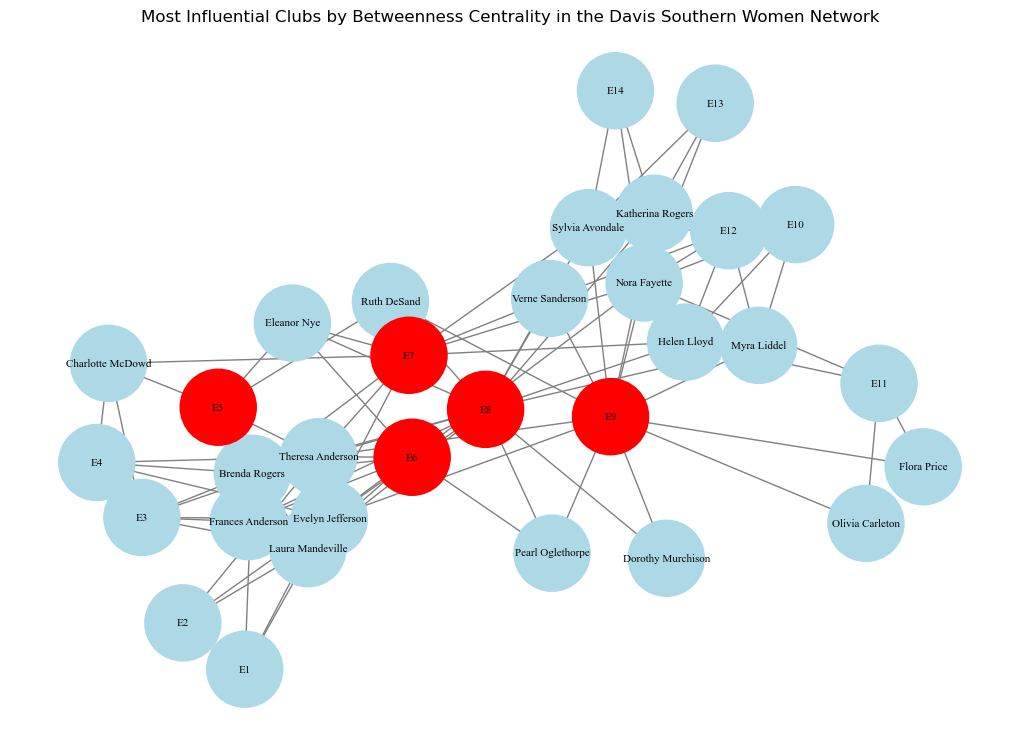

In [42]:
# Assign colors: Highly central events = red, others = lightblue
clubs_colors = ["red" if node in top5_clubs_betweenness else "lightblue" for node in G.nodes()]

# Draw the bipartite network
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_color=clubs_colors, edge_color="gray", node_size=3000, font_size=8, 
        font_family="Times New Roman")
plt.title("Most Influential Clubs by Betweenness Centrality in the Davis Southern Women Network")
plt.show()

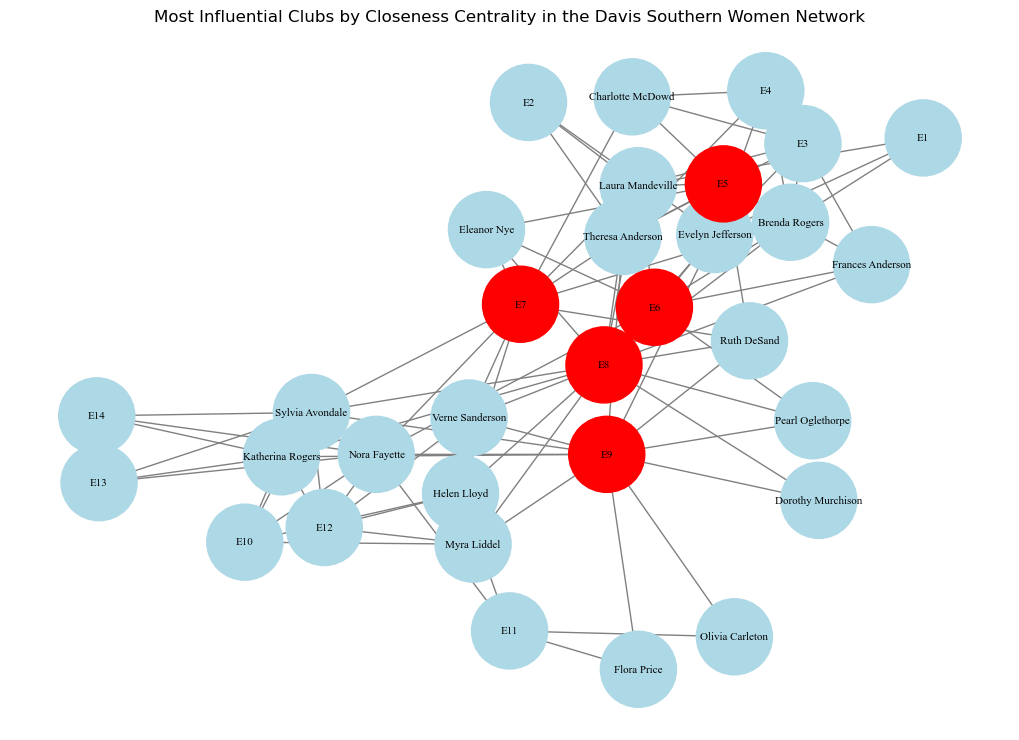

In [43]:
# Assign colors: Highly central events = red, others = lightblue
clubs_colors = ["red" if node in top5_clubs_closeness else "lightblue" for node in G.nodes()]

# Draw the bipartite network
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_color=clubs_colors, edge_color="gray", node_size=3000, font_size=8, 
        font_family="Times New Roman")
plt.title("Most Influential Clubs by Closeness Centrality in the Davis Southern Women Network")
plt.show()

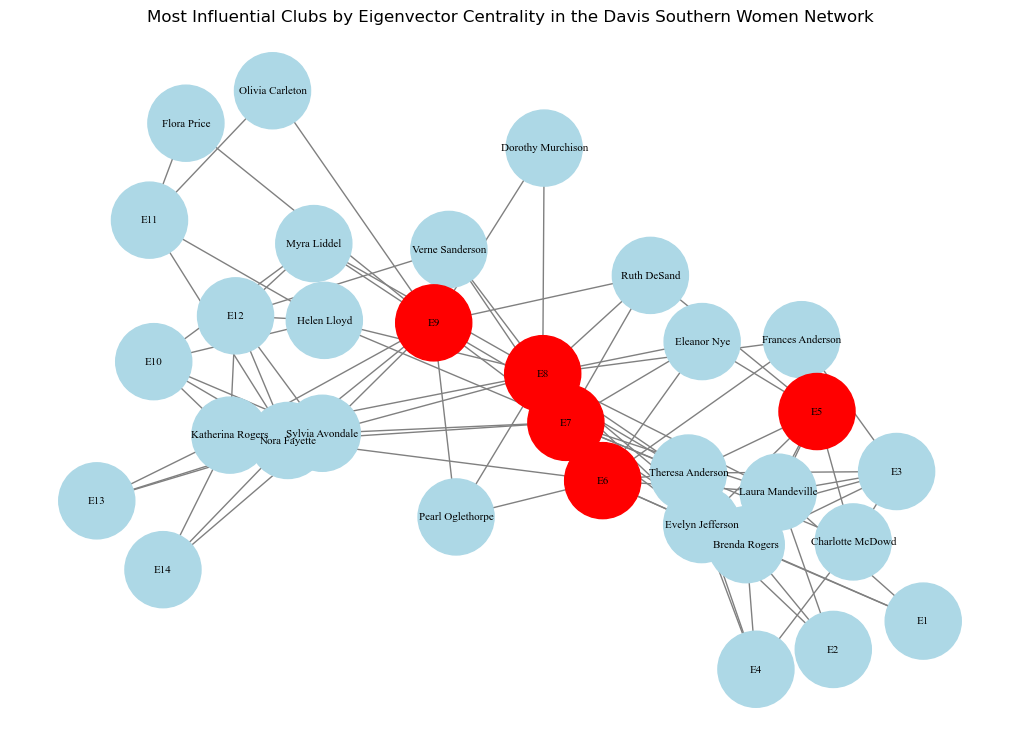

In [44]:
# Assign colors: Highly central events = red, others = lightblue
clubs_colors = ["red" if node in top5_clubs_eigenvector else "lightblue" for node in G.nodes()]

# Draw the bipartite network
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_color=clubs_colors, edge_color="gray", node_size=3000, font_size=8, 
        font_family="Times New Roman")
plt.title("Most Influential Clubs by Eigenvector Centrality in the Davis Southern Women Network")
plt.show()

## Key Insights & Observations

When analyzing each of the centrality measures among the women in the dataset, some key observations stand out. Theresa Anderson and Evelyn Jefferson were in the top 3 for each centrality measure, which indicates that they are highly connected within the community. Nora Fayette also ranked in the top 3 for degree, betweenness and closeness centralities, but ranked 6th in eigenvector centrality, which suggest that she doesn't have as many strong connections with other women that have strong connections. Sylvia Avondale was also in the top 5 in each centrality measure, but never ranked higher than 4th.

When examining the community groups among the women, Theresa Anderson, Evelyn Jefferson and Laura Mandeville are in the same social group, which contains 8 total women, and are also in the top 5 for each centrality measure. Nora Fayette and Sylvia Avondale are in a different social group than Theresa, Evelyn, and Laura, which contains more members with 10. The overall low betweenness centrality measures can be captured by the two community groups having nodes that are mostly separated. 

E8 ranked first for each centrality measure among the social clubs. Their high centrality measure among the clubs shows how influential they are. Additionally, E9 and E7 were in the top 3 in each centrality measure, which suggests that they are also influential among other clubs. E5 and E6 were ranked either 4th or 5th for each centrality measure. Overall, these 5 clubs are most influential in each centrality measure category, with E8 being in tier 1, E7 and E9 in tier 2, and E5 and E6 in tier 3 in terms of influence. 